In [1]:
#Imported necessary packages and dataset used for the analysis
import pandas as pd
import numpy as np
netflix_dataset= pd.read_csv("C:/Users/ADMIN/Downloads/archive (2)/netflix_titles.csv")

#Generated a summary of the dataset to be used
summary= netflix_dataset.describe()
print(summary)
netflix_dataset.info()
head_of_netds= netflix_dataset.head(100)
print(head_of_netds)

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
   show_id     type                                              title  

In [5]:
#Created a dataframe that consisted of the total amount of entertainment media released over the years
total_number_of_media_per_year= netflix_dataset.groupby('release_year')['type'].value_counts().unstack(fill_value=0)
total_number_of_media_per_year.rename(columns={'type': 'Total Number of Media'}, inplace= True)
total_number_of_media_per_year.rename(columns={'release_year': 'Release Year'}, inplace= True)
total_number_of_media_per_year.reset_index(inplace= True)
total_number_of_media_per_year.head(100)

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
...,...,...,...
69,2017,767,265
70,2018,767,380
71,2019,633,397
72,2020,517,436


In [9]:
#Created a dataframe that consisted of the total amount of entertainment media according to their ratings
total_number_of_media_per_rating= netflix_dataset.groupby('rating')['type'].value_counts().unstack(fill_value=0)
total_number_of_media_per_rating.rename(columns={'type': 'Total Number of Media'}, inplace= True)
total_number_of_media_per_rating.rename(columns={'rating': 'Rating'}, inplace= True)
total_number_of_media_per_rating.reset_index(inplace= True)
total_number_of_media_per_rating.head(100)

type,rating,Movie,TV Show
0,66 min,1,0
1,74 min,1,0
2,84 min,1,0
3,G,41,0
4,NC-17,3,0
5,NR,75,5
6,PG,287,0
7,PG-13,490,0
8,R,797,2
9,TV-14,1427,733


In [11]:
#Created a dataframe that consisted of the total amount of entertainment media consumed by each country
total_number_of_media_consumed_per_country= netflix_dataset.groupby('country')['type'].value_counts().unstack(fill_value=0)
total_number_of_media_consumed_per_country.rename(columns={'type': 'Total Number of Media'}, inplace= True)
total_number_of_media_consumed_per_country.rename(columns={'county': 'Country'}, inplace= True)
total_number_of_media_consumed_per_country.reset_index(inplace= True)
total_number_of_media_consumed_per_country.head(100)

type,country,Movie,TV Show
0,", France, Algeria",1,0
1,", South Korea",0,1
2,Argentina,38,18
3,"Argentina, Brazil, France, Poland, Germany, De...",1,0
4,"Argentina, Chile",2,0
...,...,...,...
95,"Canada, United States, United Kingdom, France,...",0,1
96,Chile,11,3
97,"Chile, Argentina",1,0
98,"Chile, Argentina, France, Spain, United States",1,0


In [15]:
#Created a dataframe that consisted of the amount of entertainment media according to their categories
total_number_of_media_per_category= netflix_dataset.groupby('listed_in')['type'].value_counts().unstack(fill_value=0)
total_number_of_media_per_category.rename(columns={'type': 'Total Number of Media'}, inplace= True)
total_number_of_media_per_category.rename(columns={'listed_in': 'Category'}, inplace= True)
total_number_of_media_per_category.reset_index(inplace= True)
total_number_of_media_per_category.head(100)

type,listed_in,Movie,TV Show
0,Action & Adventure,128,0
1,"Action & Adventure, Anime Features",1,0
2,"Action & Adventure, Anime Features, Children &...",4,0
3,"Action & Adventure, Anime Features, Classic Mo...",2,0
4,"Action & Adventure, Anime Features, Horror Movies",1,0
...,...,...,...
95,"British TV Shows, Classic & Cult TV, TV Comedies",0,2
96,"British TV Shows, Crime TV Shows, Docuseries",0,21
97,"British TV Shows, Crime TV Shows, Internationa...",0,25
98,"British TV Shows, Crime TV Shows, TV Dramas",0,4


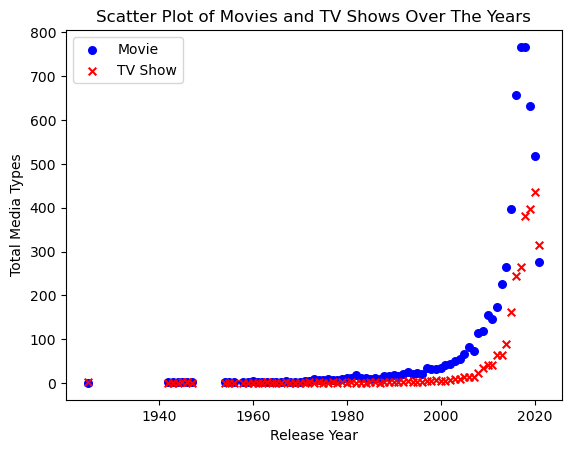

In [17]:
#Imported necessary packages for visuaizations
import matplotlib.pyplot as plt
import seaborn as snss

#Generated two scatter plots
plt.scatter(total_number_of_media_per_year['release_year'], total_number_of_media_per_year['Movie'], label='Movie', color='blue', marker='o', s=30)
plt.scatter(total_number_of_media_per_year['release_year'], total_number_of_media_per_year['TV Show'], label='TV Show', color='red', marker='x', s=30)

# Add labels and a title
plt.xlabel('Release Year')
plt.ylabel('Total Media Types')
plt.title('Scatter Plot of Movies and TV Shows Over The Years')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total Number of Media per Rating Type')

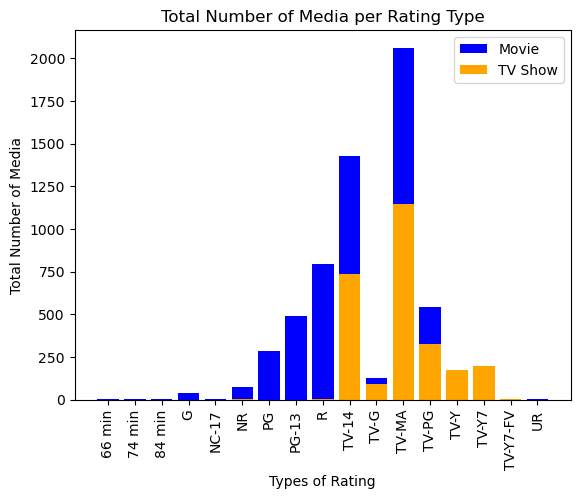

In [19]:
#Generated bar charts with different categories
plt.bar(total_number_of_media_per_rating['rating'], total_number_of_media_per_rating['Movie'], label='Movie', color ="blue")
plt.bar(total_number_of_media_per_rating['rating'], total_number_of_media_per_rating['TV Show'], label='TV Show', color="orange")

# Add labels and a title
plt.xlabel('Types of Rating')
plt.ylabel('Total Number of Media')
plt.legend()
plt.xticks(rotation=90)
plt.title('Total Number of Media per Rating Type')

In [21]:
#Installed necessary packages for map visualizations
get_ipython().system('pip install pygal geopandas')

   ---------------------------------------- 0.0/129.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.5 kB ? eta -:--:--
   --------- ------------------------------ 30.7/129.5 kB 1.4 MB/s eta 0:00:01
   ------------ -------------------------- 41.0/129.5 kB 991.0 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/129.5 kB 656.4 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/129.5 kB 525.1 kB/s eta 0:00:01
   -------------------------------------- 129.5/129.5 kB 587.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/338.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/338.4 kB ? eta -:--:--
   ------------- -------------------------- 112.6/338.4 kB 3.2 MB/s eta 0:00:01
   -------------- ------------------------- 122.9/338.4 kB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 122.9/338.4 kB 1.2 MB/s eta 0:00:01
   ---------------- --------------------- 143.4/338.4 kB 847.9 kB/s eta 0:00

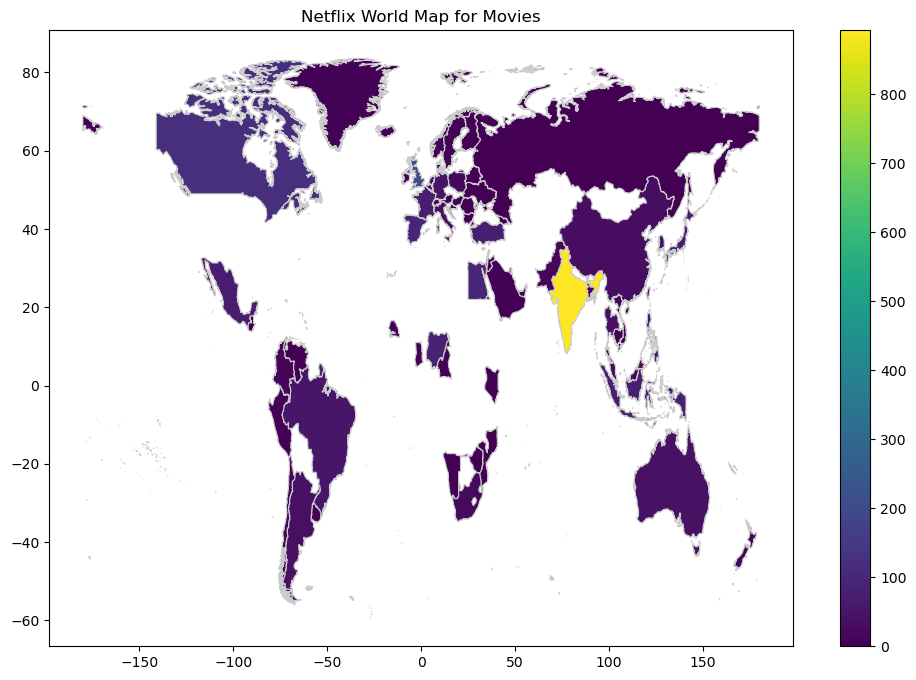

In [29]:
#Imported necessary packages
import geopandas as gpd

# Loaded the world map shapefile
world = gpd.read_file("C:/Users/ADMIN/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Merged your data with the world map using a common column (e.g., 'Country')
merged_data = world.set_index('SOVEREIGNT').join(total_number_of_media_consumed_per_country.set_index('country'))

# Created the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Netflix World Map for Movies')

# Plot the map with your data (e.g., 'Value' column)
merged_data.plot(column='Movie', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_aspect('auto')

# Show the map
plt.show()

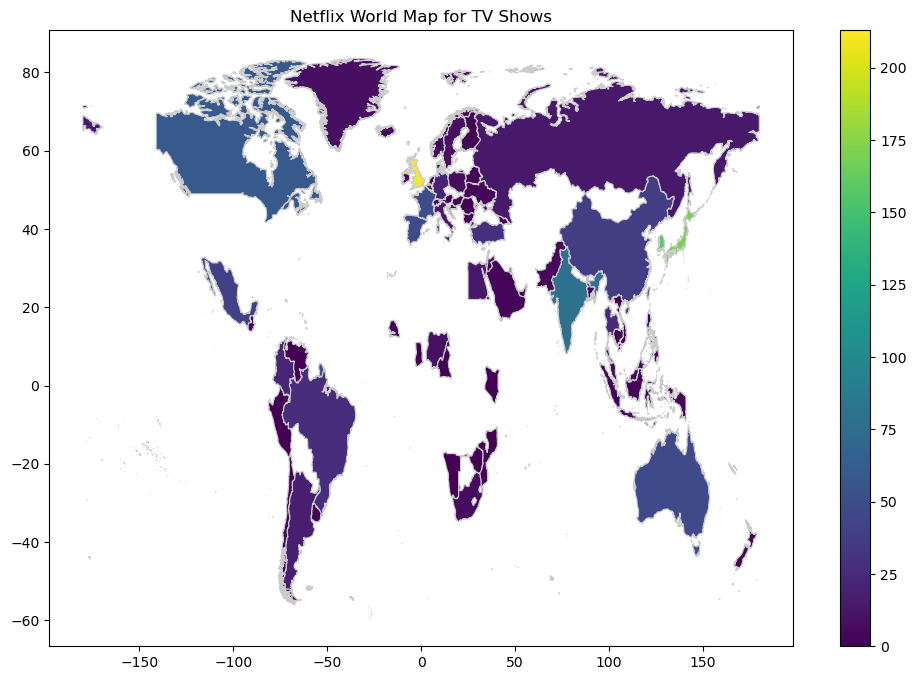

In [33]:
# Load the world map shapefile
world = gpd.read_file("C:/Users/ADMIN/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Merged the data with the world map using a common column
merged_data = world.set_index('SOVEREIGNT').join(total_number_of_media_consumed_per_country.set_index('country'))

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Netflix World Map for TV Shows')

# Plot the map with your data (e.g., 'Value' column)
merged_data.plot(column='TV Show', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_aspect('auto')

# Show the map
plt.show()
